# Backtest a  Strategy

In [1]:
%matplotlib inline
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()
from smartbots.crypto.historical_downloader import historical_downloader, save_test_data
import datetime as dt
import pandas as pd
from smartbots.engine.data_reader import read_data_to_dataframe
from smartbots.engine.portfolio_constructor import Portfolio_Constructor

CCXT Version: 1.95.29


/usr/local/lib/python3.8/site-packages/arctic/store/_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## 1) Download Historical Data from Data Provider and save into the database.
Please see here the docs of the exchanges available: https://github.com/ccxt/ccxt/wiki/Manual#markets


If you already have the data in a database, you can skip this step and go to the next.

Dependings of the symbols and the length of the data, the data loader will take some time to complete. Be pacience.

If there are already some data in the database, it will update only the new data.


In [2]:
# Parameters
interval = '1h'  # 1m , 5m, 30m, 1h
provider = 'kucoin'  # test , binance, coinbase ...
fresh_start = True # if you want to download the symbols again
if provider == 'test': # test data
    save_test_data()
else:
    symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
    start_date = dt.datetime(2018,1,1) # Start date of data to download
    end_date = dt.datetime.utcnow() # End date of data to download
    clean_symbols_database = []
    if fresh_start:
        clean_symbols_database = symbols
     # Interval of data to download,
    historical_downloader(symbols=symbols,start_date=start_date, end_date=dt.datetime.utcnow(),
           provider=provider,clean_symbols_database=clean_symbols_database,interval=interval)

Library created, but couldn't enable sharding: no such command: 'enablesharding', full error: {'ok': 0.0, 'errmsg': "no such command: 'enablesharding'", 'code': 59, 'codeName': 'CommandNotFound'}. This is OK if you're not 'admin'


BTC-USDT Since: 2018-03-04T11:01:00.000Z
BTC-USDT Since: 2018-05-05T23:01:00.000Z
BTC-USDT Since: 2018-07-07T11:01:00.000Z
BTC-USDT Since: 2018-09-07T23:01:00.000Z
BTC-USDT Since: 2018-11-09T11:01:00.000Z
BTC-USDT Since: 2019-01-10T23:01:00.000Z
BTC-USDT Since: 2019-03-14T11:01:00.000Z
BTC-USDT Since: 2019-05-15T23:01:00.000Z
BTC-USDT Since: 2019-07-17T11:01:00.000Z
BTC-USDT Since: 2019-09-17T23:01:00.000Z
BTC-USDT Since: 2019-11-19T11:01:00.000Z
BTC-USDT Since: 2020-01-20T23:01:00.000Z
BTC-USDT Since: 2020-03-23T11:01:00.000Z
BTC-USDT Since: 2020-05-24T23:01:00.000Z
BTC-USDT Since: 2020-07-26T11:01:00.000Z
BTC-USDT Since: 2020-09-26T23:01:00.000Z
BTC-USDT Since: 2020-11-28T11:01:00.000Z
BTC-USDT Since: 2021-01-29T23:01:00.000Z
BTC-USDT Since: 2021-04-02T11:01:00.000Z
BTC-USDT Since: 2021-06-03T23:01:00.000Z
BTC-USDT Since: 2021-08-05T11:01:00.000Z
BTC-USDT Since: 2021-10-06T23:01:00.000Z
BTC-USDT Since: 2021-12-08T11:01:00.000Z
BTC-USDT Since: 2022-02-08T23:01:00.000Z
BTC-USDT Since: 

## 2) Read Historical Data from Database and Visualize it.


In [3]:
provider = 'kucoin'
symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
start_date = dt.datetime(2018,1,1) # Start date of data to download
end_date = dt.datetime.utcnow() # End date of data to download
df1 = read_data_to_dataframe(symbols[0], provider,start_date=start_date,end_date=end_date, interval=interval)
df2 = read_data_to_dataframe(symbols[-1], provider,start_date=start_date,end_date=end_date,interval=interval)
df = pd.concat([df1,df2],axis=0)

<AxesSubplot:xlabel='date'>

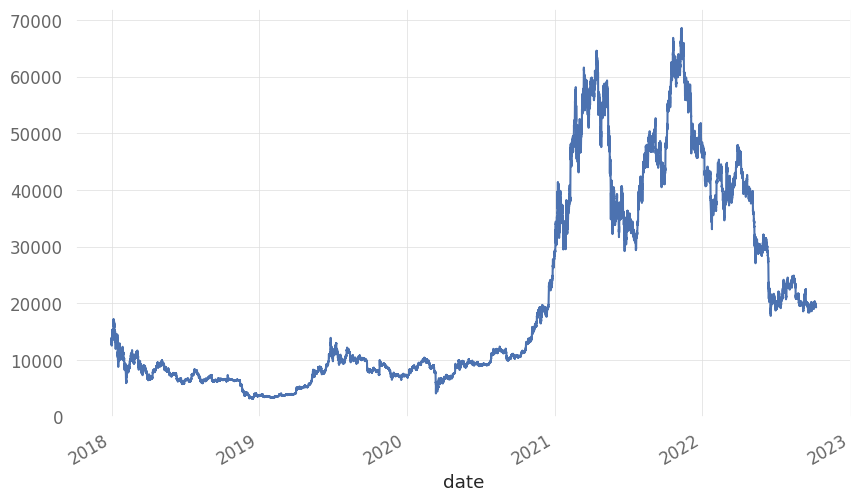

In [4]:
df1.close.plot()

## 3) BackTesting

### Settings

In [5]:
provider = 'kucoin'
inicial_cash = 50000 # initial capital for the portfolio
start_date = dt.datetime(2018,1,1) # Start date for backtesting


strategy1 = {'id': 1, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'BTC-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}

strategy2 = {'id': 2, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'ETH-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}



conf_portfolio = {'Name': 'PortfolioCrypto1',
                  'Data_Sources': 
                  [{'tickers': ['BTC-USDT','ETH-USDT'],
                   'event_type': 'bar',
                   'historical_source': 'mongoDB',
                   'historical_library': f'{provider}_historical_{interval}'}],
                   'Strategies': 
                    [strategy1, strategy2]}

In [11]:
portfolio = Portfolio_Constructor(conf_portfolio, run_real=False, asset_type='crypto',
                                             send_orders_to_broker=False, start_date=start_date,
                                  inicial_cash=inicial_cash)
portfolio.run_simulation() # backtest 

info_port = portfolio.get_saved_values_strategy() # read change of positions

Loading BTC-USDT from 2018-01-01 00:00:00
Loading ETH-USDT from 2018-01-01 00:00:00
Loading BTC-USDT from 2018-02-01 00:00:00
Loading ETH-USDT from 2018-02-01 00:00:00
Loading BTC-USDT from 2018-03-01 00:00:00
Loading ETH-USDT from 2018-03-01 00:00:00
Loading BTC-USDT from 2018-04-01 00:00:00
Loading ETH-USDT from 2018-04-01 00:00:00
Loading BTC-USDT from 2018-05-01 00:00:00
Loading ETH-USDT from 2018-05-01 00:00:00
Loading BTC-USDT from 2018-06-01 00:00:00
Loading ETH-USDT from 2018-06-01 00:00:00
Loading BTC-USDT from 2018-07-01 00:00:00
Loading ETH-USDT from 2018-07-01 00:00:00
Loading BTC-USDT from 2018-08-01 00:00:00
Loading ETH-USDT from 2018-08-01 00:00:00
Loading BTC-USDT from 2018-09-01 00:00:00
Loading ETH-USDT from 2018-09-01 00:00:00
Loading BTC-USDT from 2018-10-01 00:00:00
Loading ETH-USDT from 2018-10-01 00:00:00
Loading BTC-USDT from 2018-11-01 00:00:00
Loading ETH-USDT from 2018-11-01 00:00:00
Loading BTC-USDT from 2018-12-01 00:00:00
Loading ETH-USDT from 2018-12-01 0

## Statistics

Plots and statistics of the Strategies and the Portfolio.

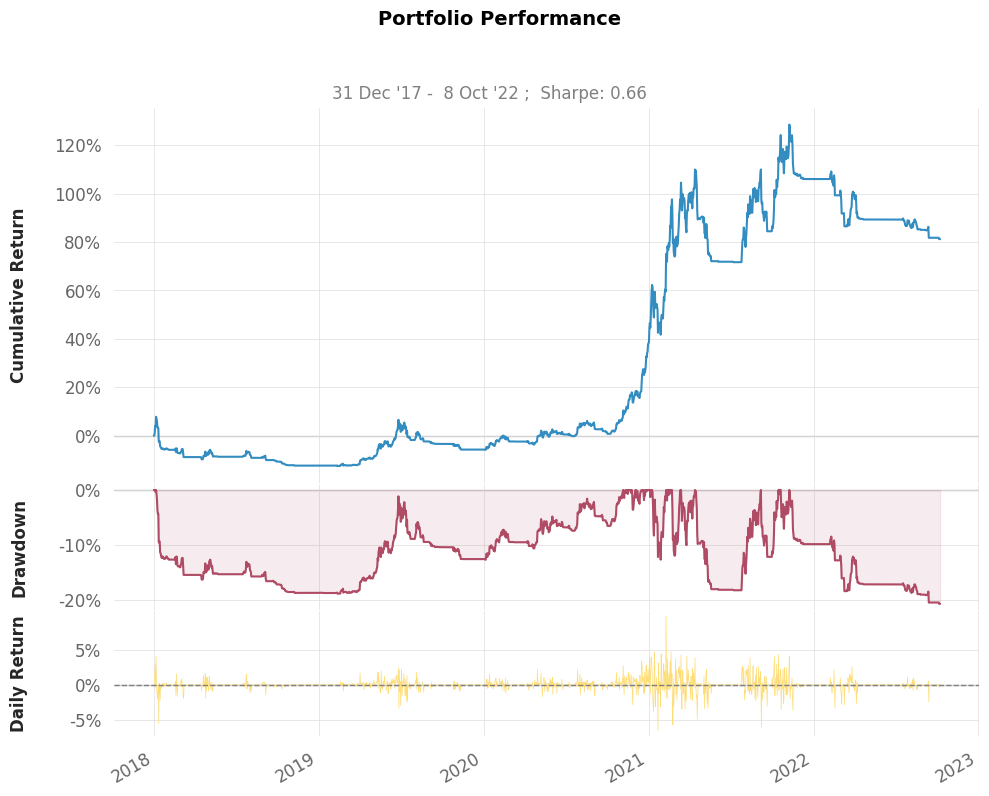

In [12]:
equities =portfolio.equity_handler.get_equities()
portfolio = equities['equity_portfolio']['equity']
port_return = portfolio.pct_change()
qs.plots.snapshot(portfolio, title='Portfolio Performance')

In [13]:
qs.reports.metrics(port_return, "BTC",mode= 'basic')

TypeError: Cannot compare tz-naive and tz-aware timestamps